In [1]:
pip install mlxtend

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the .xlsx file
df = pd.read_excel("Online retail.xlsx", header = None)
dg = df[0].str.split(',', expand=True)

In [7]:
print(dg)

                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [8]:
grocery_items = set()
for col in dg.columns:
    grocery_items.update(dg[col].unique())

output_list = list()
for _, row in dg.iterrows():
    row_val = {item: 0 for item in grocery_items}
    row_val.update({item: 1 for item in row if pd.notna(item)})
    output_list.append(row_val)

grocery = pd.DataFrame(output_list)

grocery.head()

,dessert wine,parmesan cheese,salmon,bramble,sparkling water,energy bar,flax seed,green beans,whole wheat rice,tomatoes,...,cottage cheese,milk,shampoo,rice,energy drink,whole wheat pasta,chocolate,asparagus,mashed potato,extra dark chocolate
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
grocery.columns.tolist()

['dessert wine',
 'parmesan cheese',
 'salmon',
 'bramble',
 'sparkling water',
 'energy bar',
 'flax seed',
 'green beans',
 'whole wheat rice',
 'tomatoes',
 'soda',
 'body spray',
 'eggs',
 'burgers',
 'frozen vegetables',
 'toothpaste',
 'low fat yogurt',
 'fromage blanc',
 'pet food',
 'fresh tuna',
 'spinach',
 'cauliflower',
 'fresh bread',
 'gluten free bar',
 'bacon',
 'asparagus',
 'barbecue sauce',
 'carrots',
 'shallot',
 'whole weat flour',
 'avocado',
 'muffins',
 'tomato sauce',
 'oil',
 'mint green tea',
 'yogurt cake',
 'spaghetti',
 'french fries',
 'almonds',
 'chutney',
 'cream',
 'shrimp',
 'water spray',
 'napkins',
 'mayonnaise',
 'chili',
 'eggplant',
 'green tea',
 'clothes accessories',
 'light mayo',
 'ketchup',
 'yams',
 'brownies',
 'blueberries',
 'babies food',
 'mineral water',
 'frozen smoothie',
 'nonfat milk',
 'salad',
 'herb & pepper',
 'strawberries',
 'cake',
 'oatmeal',
 'black tea',
 'soup',
 'cider',
 'turkey',
 'vegetables mix',
 'strong chees

In [10]:
# View top sold items

total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  29358

Item Summary:
       item_name  item_count
0  mineral water        1788
1           eggs        1348
2      spaghetti        1306
3   french fries        1282
4      chocolate        1229


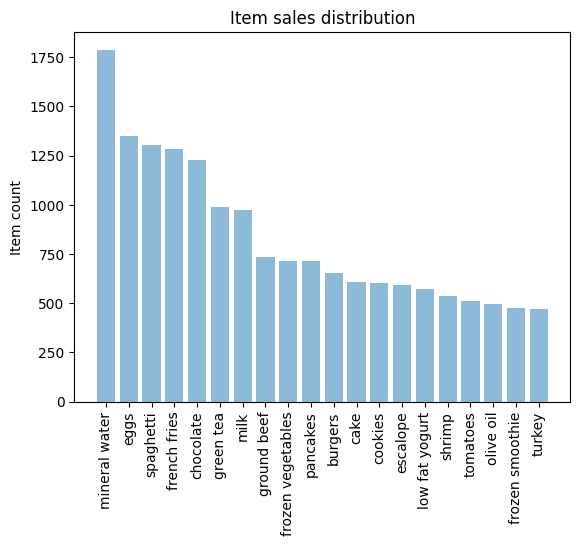

In [11]:
# Visualize top sold items

objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

In [12]:
# Generating frequent item sets

frequent_itemsets = apriori(grocery, min_support=0.047, use_colnames=True)

In [13]:
# Generating rules

my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [14]:
#viewing top 100 rules

my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
5,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
6,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
7,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


What is lift and why is it important in Association rules?

Lift: Lift is a measure used in association rule mining to quantify how much more often the antecedent and consequent of a rule occur together than we would expect if they were statistically independent. It is calculated as the ratio of the observed support to the expected support if the antecedent and consequent were independent. Lift helps to determine the strength of a rule and indicates the strength of the relationship between items.

What is support and Confidence. How do you calculate them?



Support: Support is a measure that indicates how frequently an itemset appears in a dataset. It is calculated as the number of transactions containing the itemset divided by the total number of transactions.

Confidence: Confidence is a measure that indicates the likelihood of the consequent appearing in a transaction given that the antecedent is present. It is calculated as the number of transactions containing both the antecedent and the consequent divided by the number of transactions containing the antecedent.

Mathematically:

Support of {A} = (Transactions containing {A}) / (Total transactions)

Confidence of {A -> B} = (Transactions containing both {A and B}) / (Transactions containing {A})

What are some limitations or challenges of Association rules mining?

Large itemsets: As the number of items increases, the number of possible itemsets grows exponentially, leading to a combinatorial explosion. This makes it computationally expensive to find all frequent itemsets.

Sparse datasets: In datasets where most items occur rarely, finding meaningful associations becomes challenging. Low support values may lead to many false positive associations.

Multiple testing: When mining for associations among many itemsets, there's a higher chance of finding spurious associations due to multiple comparisons.

Interpreting results: While association rules provide insights into co-occurrence patterns, interpreting the rules and understanding their implications in a real-world context can be complex.

Data quality: Association rules are sensitive to noise and outliers in the data, which can lead to misleading or incorrect associations.

Scalability: For large datasets, the computational complexity of finding frequent itemsets and generating rules can be prohibitive.

Context and domain knowledge: Association rules do not capture causality or temporal relationships. Understanding the context and domain knowledge is crucial for interpreting and applying the rules correctly.